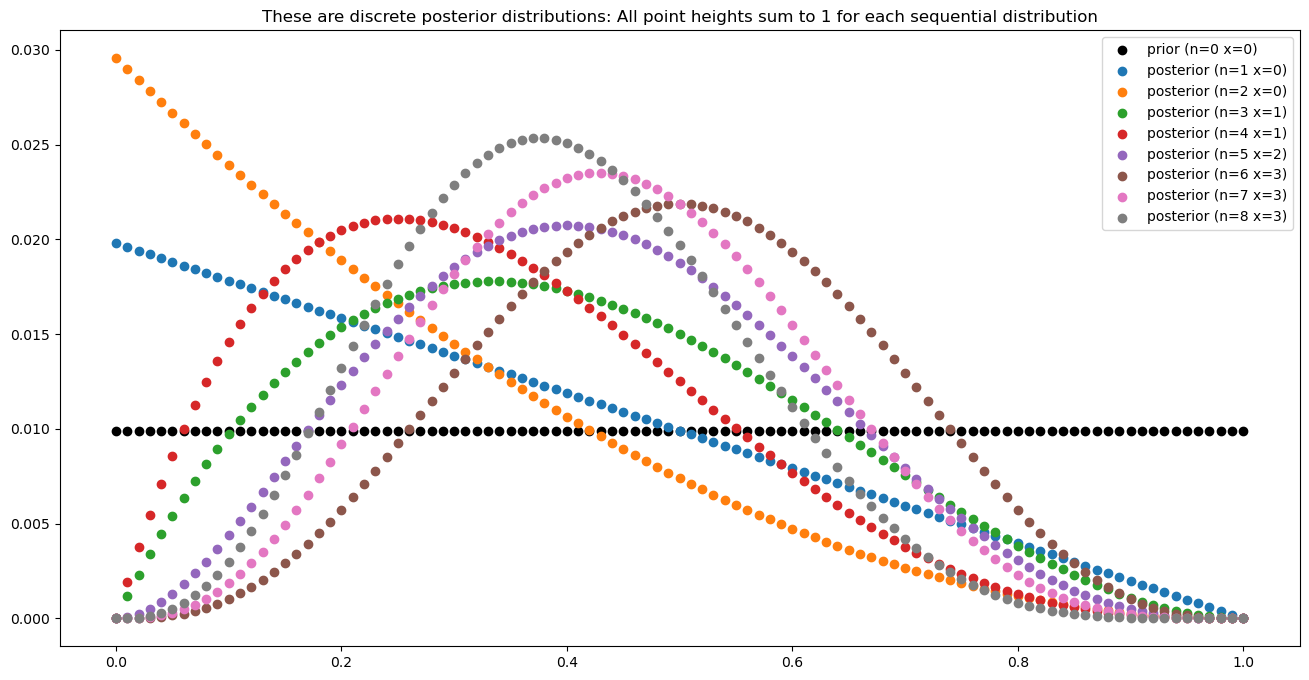

In [11]:
## Question 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0, 1, 101)
prior = np.ones(101) / 101

observations = [0, 0, 1, 0, 1, 1, 0, 0]
n, x = 0, 0
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label="prior (n=" + str(n) + " x=" + str(x) + ")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    posterior = stats.binom.pmf(x, n, parameter_domain)
    posterior = posterior / posterior.sum()  # Normalize the posterior

    plt.scatter(parameter_domain, posterior, label="posterior (n=" + str(n) + " x=" + str(x) + ")")

plt.legend()
plt.show()


Final estimate for theta1: 0.13745019920318724
Final estimate for theta2: 0.40836653386454186


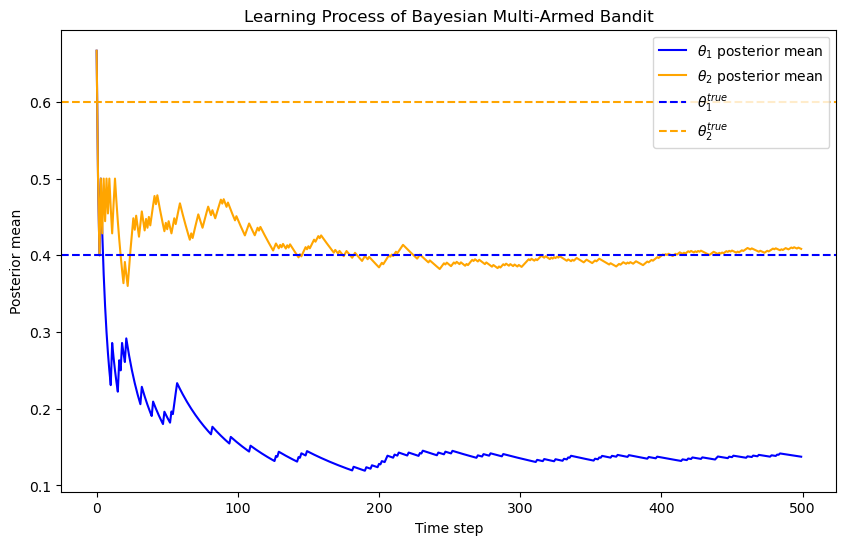

In [10]:
## Question 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Initialize parameters
theta_true_1 = 0.4
theta_true_2 = 0.6

# Prior parameters for Beta distribution
alpha_1, beta_1 = 1, 1
alpha_2, beta_2 = 1, 1


n_steps = 500

# Store posterior means over time
theta_1_posterior = []
theta_2_posterior = []

# Simulate the process
for t in range(n_steps):
    # Simulate a trial outcome (random success/failure for each arm)
    if np.random.rand() < beta(alpha_1, beta_1).mean():
        # Success for arm 1
        alpha_1 += 1
    else:
        # Failure for arm 1
        beta_1 += 1
    
    if np.random.rand() < beta(alpha_2, beta_2).mean():
        # Success for arm 2
        alpha_2 += 1
    else:
        # Failure for arm 2
        beta_2 += 1
    
    # Update posterior means for each arm
    theta_1_posterior.append(beta(alpha_1, beta_1).mean())
    theta_2_posterior.append(beta(alpha_2, beta_2).mean())

# posterior means
plt.figure(figsize=(10, 6))
plt.plot(theta_1_posterior, label=r'$\theta_1$ posterior mean', color='blue')
plt.plot(theta_2_posterior, label=r'$\theta_2$ posterior mean', color='orange')

# true values
plt.axhline(y=theta_true_1, color='blue', linestyle='--', label=r'$\theta_1^{true}$')
plt.axhline(y=theta_true_2, color='orange', linestyle='--', label=r'$\theta_2^{true}$')

#labels and legend
plt.title('Learning Process of Bayesian Multi-Armed Bandit')
plt.xlabel('Time step')
plt.ylabel('Posterior mean')
plt.legend()

#final estimates
print(f"Final estimate for theta1: {theta_1_posterior[-1]}")
print(f"Final estimate for theta2: {theta_2_posterior[-1]}")

plt.show()

Final posterior mean estimate for Theta 1 (Independent Beta): 0.627906976744186
Final posterior mean estimate for Theta 2 (Independent Beta): 0.31893687707641194
Final posterior mean estimate for Theta 3 (Independent Beta): 0.3953488372093023
Final posterior mean estimate for Theta (Joint Dirichlet): 0.4473975636766334


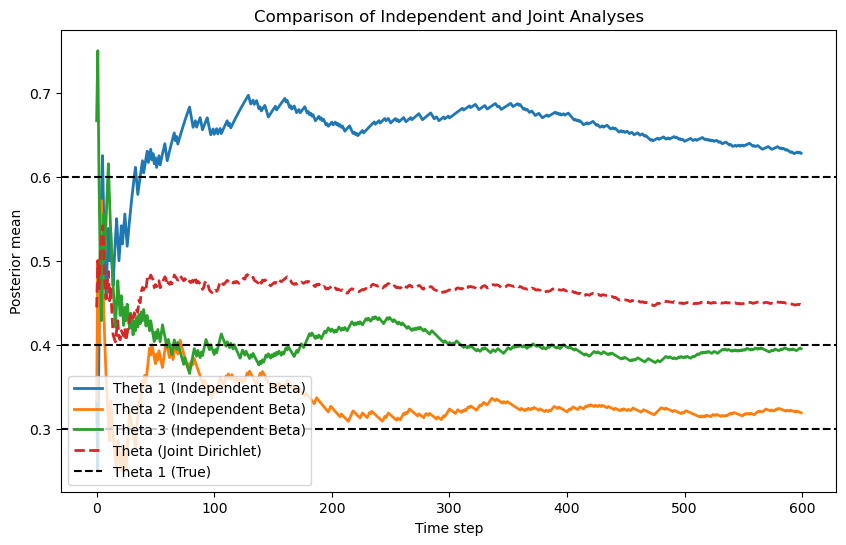

In [12]:
## Question 3 code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True values
theta_true = [0.6, 0.3, 0.4]

# Initialize prior parameters for Beta distribution 
alpha = [1, 1, 1]
beta_param = [1, 1, 1]

# Simulate the process
n_steps = 600
posterior_means_independent = {i: [] for i in range(3)}
posterior_mean_joint = []

# Data for each entity 
data = [np.random.binomial(1, p=theta_true[i], size=n_steps) for i in range(3)]

# Perform Beta-Binomial 
for t in range(n_steps):
    for i in range(3):
        alpha[i] += data[i][t]
        beta_param[i] += 1 - data[i][t]
        posterior_means_independent[i].append(beta(alpha[i], beta_param[i]).mean())
    
    joint_posterior_mean = np.mean([beta(alpha[i], beta_param[i]).mean() for i in range(3)])
    posterior_mean_joint.append(joint_posterior_mean)

# the posterior means
plt.figure(figsize=(10, 6))

# independent Beta-Binomial estimates
for i in range(3):
    plt.plot(posterior_means_independent[i], label=f'Theta {i+1} (Independent Beta)', lw=2)

# joint Dirichlet-Multinomial estimate
plt.plot(posterior_mean_joint, label='Theta (Joint Dirichlet)', linestyle='--', lw=2)

# Add true values as dashed lines
for i, true_value in enumerate(theta_true):
    plt.axhline(y=true_value, color='black', linestyle='--', label=f'Theta {i+1} (True)' if i == 0 else "")


plt.title('Comparison of Independent and Joint Analyses')
plt.xlabel('Time step')
plt.ylabel('Posterior mean')
plt.legend()
for i in range(3):
    print(f"Final posterior mean estimate for Theta {i+1} (Independent Beta): {posterior_means_independent[i][-1]}")
print(f"Final posterior mean estimate for Theta (Joint Dirichlet): {posterior_mean_joint[-1]}")

plt.show()